In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [4]:
"""N = 4
M = 3
V = 1
mu = 0.5

states, _ = enumerate_states(N,M)

Js = np.linspace(0, 2, 100)

op1 = single_site_number_operator(N, M, site_index=N//2, synth_level=0, states=states)
op2 = single_site_number_operator(N, M, site_index=N//2+1, synth_level=0, states=states)

new_long_range_corr_funcs = []

for J in Js:
    hamiltonian = construct_hamiltonian(N, M, V, mu, J)
    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
    
    # Construct the projector and get degenerate states
    P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
    d = len(degenerate_states)  # Degeneracy
    
    # Compute <O1 O2> averaged over the degenerate manifold
    O1O2_exp = np.trace(P @ op1 @ op2) / d
    
    # Compute <O1> and <O2> averaged over the degenerate manifold
    O1_exp = np.trace(P @ op1) / d
    O2_exp = np.trace(P @ op2) / d
    
    corr_func = O1O2_exp - O1_exp * O2_exp
    new_long_range_corr_funcs.append(corr_func)

fig, ax = plt.subplots()
ax.plot(Js, new_long_range_corr_funcs, '-b')"""

"N = 4\nM = 3\nV = 1\nmu = 0.5\n\nstates, _ = enumerate_states(N,M)\n\nJs = np.linspace(0, 2, 100)\n\nop1 = single_site_number_operator(N, M, site_index=N//2, synth_level=0, states=states)\nop2 = single_site_number_operator(N, M, site_index=N//2+1, synth_level=0, states=states)\n\nnew_long_range_corr_funcs = []\n\nfor J in Js:\n    hamiltonian = construct_hamiltonian(N, M, V, mu, J)\n    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)\n    \n    # Construct the projector and get degenerate states\n    P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)\n    d = len(degenerate_states)  # Degeneracy\n    \n    # Compute <O1 O2> averaged over the degenerate manifold\n    O1O2_exp = np.trace(P @ op1 @ op2) / d\n    \n    # Compute <O1> and <O2> averaged over the degenerate manifold\n    O1_exp = np.trace(P @ op1) / d\n    O2_exp = np.trace(P @ op2) / d\n    \n    corr_func = O1O2_exp - O1_exp * O2_exp\n    new_long_range_corr_funcs.append(corr_func

In [17]:
N = 4
M = 3
V = 1

states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 250)
mus = np.linspace(0, 2, 250)

site_1 = N // 2
site_2 = site_1 + 1

same_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
diff_by_1_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
diff_by_2_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
entropy_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)

# Loop
for i, mu in enumerate(mus):
    for j, J in enumerate(Js):
        hamiltonian = construct_hamiltonian(N, M, V, mu, J)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

        P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
        d = len(degenerate_states)

        # Entanglement entropy (bipartition in the middle)
        entropies = [compute_entanglement_entropy(N, M, psi, cut_site=N // 2) for psi in degenerate_states]
        entropy_grid[i, j] = np.mean(entropies)
        
        # Correlation function
        op1 = single_site_number_operator(N, M, site_index=site_1, synth_level = 0, states=states)
        for synth_level in range(M):
            op2 = single_site_number_operator(N, M, site_index=site_2, synth_level = synth_level, states=states)
            
            if synth_level == 0:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                same_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)
                
            elif synth_level == 1:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                diff_by_1_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)
            
            elif synth_level == 2:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                diff_by_2_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)

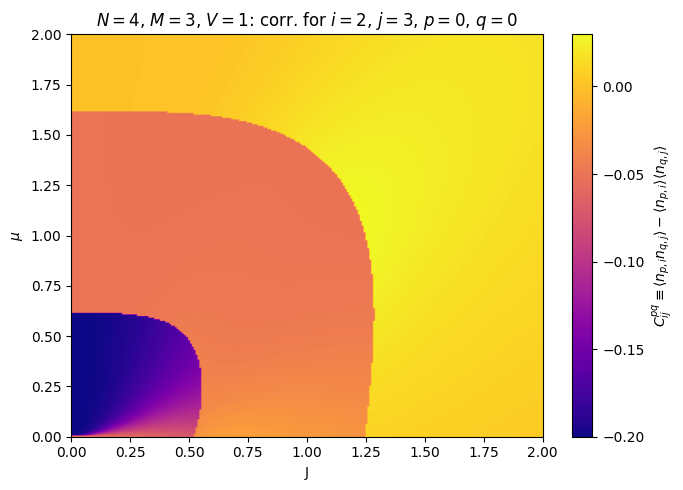

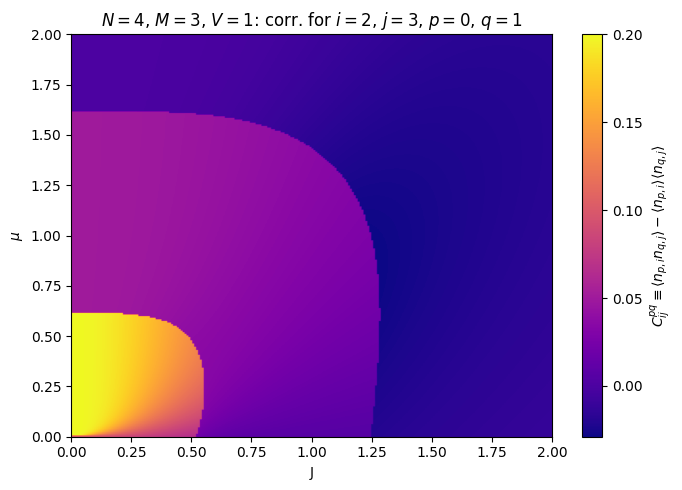

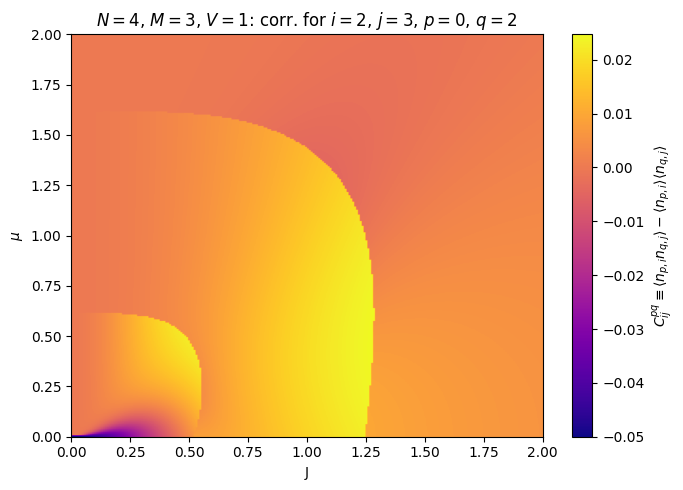

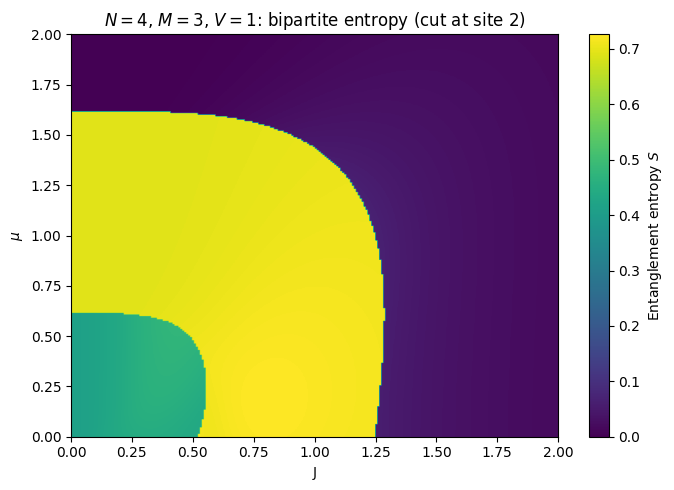

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    same_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={0}$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    diff_by_1_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={1}$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    diff_by_2_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={2}$")
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    entropy_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='viridis'
)
fig.colorbar(c, ax=ax, label=r'Entanglement entropy $S$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: bipartite entropy (cut at site {N//2})")
plt.tight_layout()
plt.show()


In [21]:
N = 5
M = 3
V = 1

states, _ = enumerate_states(N, M)

Js = np.linspace(0, 2, 250)
mus = np.linspace(0, 2, 250)

site_1 = N // 2
site_2 = site_1 + 1

same_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
diff_by_1_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
diff_by_2_synth_level_corr_func_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)
entropy_grid = np.zeros((len(mus), len(Js)), dtype=np.float64)

# Loop
for i, mu in enumerate(mus):
    for j, J in enumerate(Js):
        hamiltonian = construct_hamiltonian(N, M, V, mu, J)
        eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)

        P, degenerate_states = construct_ground_state_projector(eigenvalues, eigenvectors)
        d = len(degenerate_states)

        # Entanglement entropy (bipartition in the middle)
        entropies = [compute_entanglement_entropy(N, M, psi, cut_site=N // 2) for psi in degenerate_states]
        entropy_grid[i, j] = np.mean(entropies)
        
        # Correlation function
        op1 = single_site_number_operator(N, M, site_index=site_1, synth_level = 0, states=states)
        for synth_level in range(M):
            op2 = single_site_number_operator(N, M, site_index=site_2, synth_level = synth_level, states=states)
            
            if synth_level == 0:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                same_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)
                
            elif synth_level == 1:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                diff_by_1_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)
            
            elif synth_level == 2:
                O1O2_exp = np.trace(P @ op1 @ op2) / d
                O1_exp = np.trace(P @ op1) / d
                O2_exp = np.trace(P @ op2) / d
                diff_by_2_synth_level_corr_func_grid[i, j] = np.real(O1O2_exp - O1_exp * O2_exp)

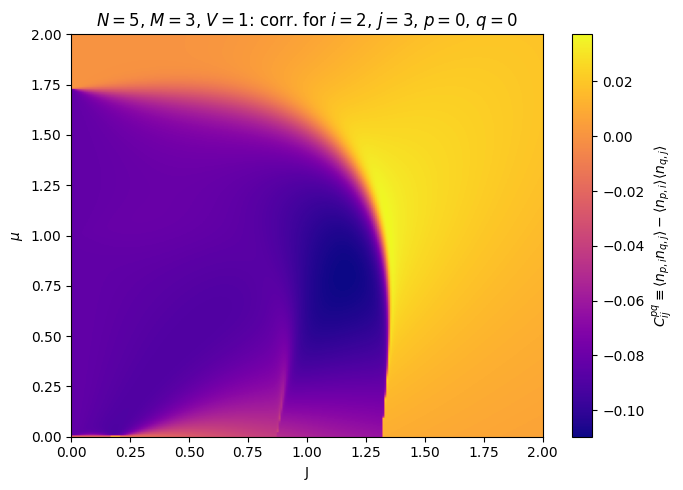

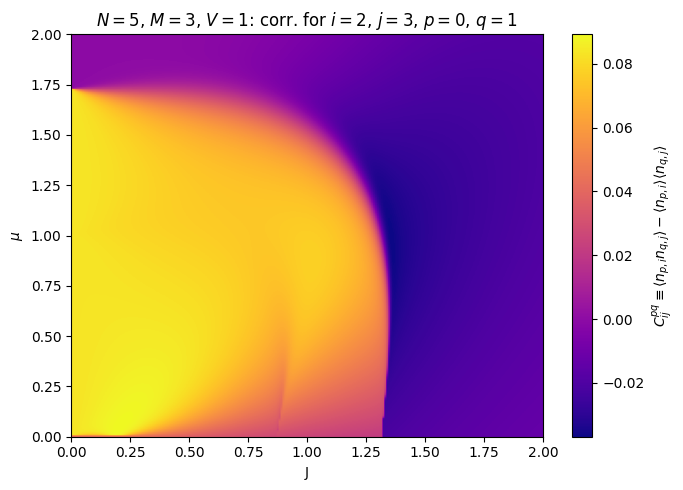

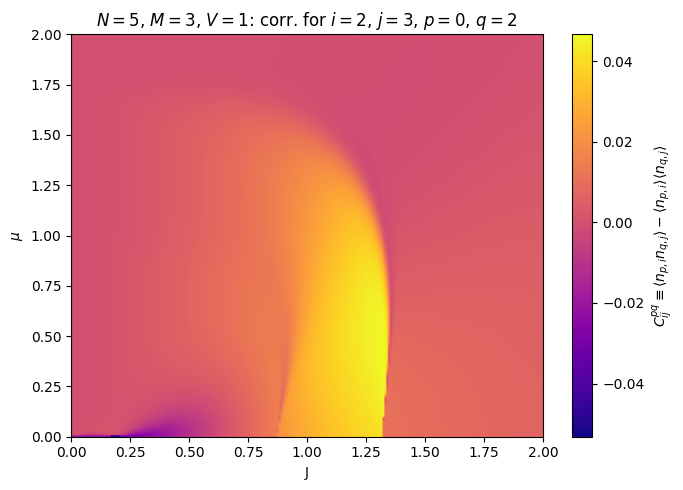

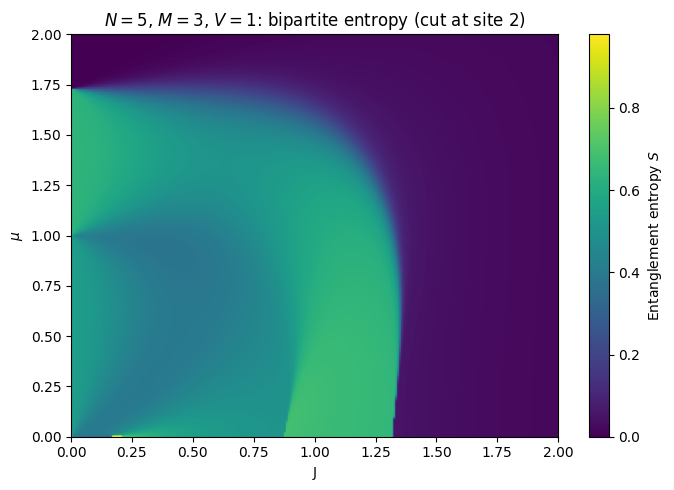

In [22]:
fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    same_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={0}$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    diff_by_1_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={1}$")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    diff_by_2_synth_level_corr_func_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='plasma'
)
fig.colorbar(c, ax=ax, label=r'$C_{ij}^{pq} \equiv \langle n_{p,i} n_{q,j} \rangle - \langle n_{p,i} \rangle \langle n_{q,j} \rangle$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: corr. for $i={site_1}$, $j={site_2}$, $p={0}$, $q={2}$")
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(7, 5))
c = ax.imshow(
    entropy_grid,
    origin='lower',
    aspect='auto',
    extent=[Js[0], Js[-1], mus[0], mus[-1]],
    cmap='viridis'
)
fig.colorbar(c, ax=ax, label=r'Entanglement entropy $S$')
ax.set_xlabel("J")
ax.set_ylabel(r"$\mu$")
ax.set_title(f"$N={N}$, $M={M}$, $V={V}$: bipartite entropy (cut at site {N//2})")
plt.tight_layout()
plt.show()
